In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv

In [2]:
def rgb_to_lab(rgb):
    rgb = rgb / 255.0
    mask = rgb > 0.04045
    rgb[mask] = np.power((rgb[mask] + 0.055) / 1.055, 2.4)
    rgb[~mask] /= 12.92
    rgb *= 100
    xyz = np.dot(rgb, np.array([[0.4124, 0.3576, 0.1805],
                                [0.2126, 0.7152, 0.0722],
                                [0.0193, 0.1192, 0.9505]]).T)
    xyz /= [95.047, 100.0, 108.883]
    mask = xyz > 0.008856
    xyz[mask] = np.power(xyz[mask], 1/3)
    xyz[~mask] = (7.787 * xyz[~mask]) + (16/116)
    lab = np.empty_like(xyz)
    lab[..., 0] = (116 * xyz[..., 1]) - 16
    lab[..., 1] = 500 * (xyz[..., 0] - xyz[..., 1])
    lab[..., 2] = 200 * (xyz[..., 1] - xyz[..., 2])
    return lab

In [3]:
# Load image
image = plt.imread('img.jpg')

# Flatten and normalize
pixels = image.reshape(-1, 3).astype(np.float32)
if np.max(pixels) > 1.0:
    pixels /= 255.0

# Convert to color spaces
hsv = rgb_to_hsv(pixels)
lab = rgb_to_lab(pixels * 255)

In [4]:
# Display mean values
print("RGB mean:", np.mean(pixels, axis=0))
print("HSV mean:", np.mean(hsv, axis=0))
print("LAB mean:", np.mean(lab, axis=0))

# Reshape for visualization
hsv_img = hsv.reshape(image.shape)
lab_img = lab.reshape(image.shape)


RGB mean: [0.53622234 0.46332645 0.39135718]
HSV mean: [0.11836078 0.2729919  0.53817415]
LAB mean: [50.41355699  4.72053795 12.99474936]


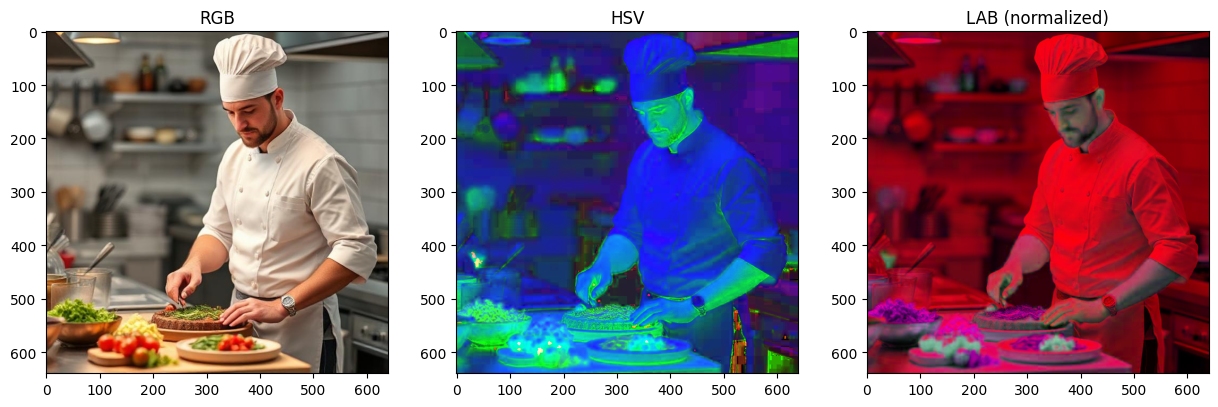

In [5]:
# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title('RGB')
axs[1].imshow(hsv_img)
axs[1].set_title('HSV')
axs[2].imshow(lab_img / np.max(lab_img))
axs[2].set_title('LAB (normalized)')
plt.show()